<a href="https://colab.research.google.com/github/Datasci266-Final-Project/Job-Listings/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import csv
import json
import re
from statistics import mean
import pandas as pd #only for eda
import matplotlib.pyplot as plt

pd.set_option('max_colwidth',400)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lux_data = pd.read_csv(r'/content/drive/MyDrive/DataSci 266 Project/Previous Data Versions/lu_data_job_titles.csv',header=None)

In [ ]:
us_data = pd.read_csv(r'/content/drive/MyDrive/DataSci 266 Project/Previous Data Versions/sample_data_job_titles.csv',header=None)

In [ ]:
lux_data['dataset']='lu'
lux_data.head()

,0,1,2,3,dataset
0,(Senior) IT SharePoint Business Analyst,"The EIB, the European Union's bank, is seeking to recruit for its Directorate – Corporate Services, Transversal Services Department – Digital Solutions Division - Collaboration & Intranet Systems Unit at its headquarters in Luxembourg, a (Senior) IT SharePoint Business Analyst*. This is a full time position at grade 5/6. Panel interviews are anticipated for end of August The term of this contr...",SENIOR,NaN,lu
1,Senior Internal Auditor,"The incumbent is responsible to the NSPA Auditor General, for performing a wide range of auditing functions, including taking the lead for specific audit tasks. POST DETAILS Duty travel expected, in accordance with NATO policy, in support of NAC-approved operations and missions, on a case-by-case basis, by traveling to theatre/mission locations, especially where Agency personnel are/will be se...",SENIOR,NaN,lu
2,Fund Accounting Manager: develop the Luxembourgish entity,"We are very glad to let you know about the new job opportunity at one of our partners! This service provider has recently been created abroad and arrived in Luxembourg a few months ago. Today they are hiring a Fund Accounting Manager. You will not have many chances to help develop an entity here, in Luxembourg, proving your skills both in accounting and in management. Our partner is looking fo...",NaN,"{'@type': 'MonetaryAmount', 'currency': 'EUR', 'value': {'@type': 'QuantitativeValue', 'maxValue': '75000', 'unitText': 'YEAR'}}",lu
3,Compliance Supervisor,"Austin Bright est actuellement à la recherche, pour l'un de ses partenaires, un responsable de la conformité (Compliance Supervisor) afin de renforcer son département compliance. Au sein d'un fournisseur de services financiers, vous prendrez en charge une équipe d'une demi-douzaine de juniors et seniors. Cette position vous offre une large autonomie car, grâce à une ligne hiérarchique directe,...",NaN,"{'@type': 'MonetaryAmount', 'currency': 'EUR', 'value': {'@type': 'QuantitativeValue', 'maxValue': '85000', 'unitText': 'YEAR'}}",lu
4,Accountant ǀ FR/EN/ESP ǀ Luxembourg train station,"Dynamic. Digitalized. Meritocratic. These are some of the many advantages that this fiduciary has to offer for you. As Medior/Senior Accountant, you will join a team of 6 people that have all gotten the opportunity to develop a real expertise and all have something to teach you, no matter their experience level. Established more than 5 years ago, this structure has specialized in the accountan...",NaN,"{'@type': 'MonetaryAmount', 'currency': 'EUR', 'value': {'@type': 'QuantitativeValue', 'maxValue': '3500', 'unitText': 'MONTH'}}",lu


In [ ]:
us_data['dataset']='us'
us_data.head()

,0,1,2,3,dataset
0,Concessions Stand Lead - Alpine Valley Music Theatre,"In order to be considered for this role, after clicking 'apply now' above and being redirected, you must fully complete the application process on the follow-up screen. The Role The Concessions Stand Lead is responsible for the complete operation of assigned concession stands. Trains personnel, supervises and directs the work activities of others. All Concessions Stand Leads report directly to...",LEAD,NaN,us
1,Junior Auditor,"What we offerExcellent health benefits plan, which includes day 1 eligibility for medical, vision and dental options401(k) with company matchCompany profit sharing planGenerous paid time off packagePaid parental leaveCompany-paid mental health benefit through Headspace2 free on-site fitness roomsEmployee Assistance ProgramEmployee Resource GroupsPersonal and professional development programJob...",JUNIOR,NaN,us
2,CFO,"CFO Opportunity with Higher Education Institution This Jobot Job is hosted by: Austin Younglove Are you a fit? Easy Apply now by clicking the ""Apply"" button and sending us your resume. Salary: $125,000 - $200,000 per year A bit about us: Our Mission is to provide quality undergraduate, graduate, certificate, and continuing education to our local and global community. We offer higher education ...",CHIEF,NaN,us
3,Senior Accountant,"Seeking an Experienced, Enthusiastic, Multi-talented Accountant, to fill a Full Time position in our Growing St. Clair Shores Company. We're looking for applicants with the following experience: Audited Financials Payroll Accounts Payables General Ledger Reconciliations Month End Closing Quarter-end and Year-end Tax filings Customer Service Experience The successful candidate will possess the ...",SENIOR,NaN,us
4,Operations Accounting Site Lead,"There are over 7 billion people on this planet. And by 2050, there will be 2 billion more... many moving into urban centers at an unprecedented rate. Making sure there is enough food, fiber and infrastructure for our rapidly growing world is what we're all about at John Deere. And it's why we're investing in our people and our technology like never before! Here the world's brightest minds are ...",LEAD,NaN,us


In [ ]:
combined_df = pd.concat([us_data,lux_data], axis=0)

In [ ]:
column_names = ['title','text','level','salary','dataset']
combined_df.columns=column_names

In [ ]:
print(combined_df.head())

                                                  title  \
0  Concessions Stand Lead - Alpine Valley Music Theatre   
1                                        Junior Auditor   
2                                                   CFO   
3                                     Senior Accountant   
4                       Operations Accounting Site Lead   

                                                                                                                                                                                                                                                                                                                                                                                                              text  \
0  In order to be considered for this role, after clicking 'apply now' above and being redirected, you must fully complete the application process on the follow-up screen. The Role The Concessions Stand Lead is responsible for the complete

In [ ]:
salary_key_types = combined_df[combined_df.salary.notnull()].salary.apply(lambda x: eval(x)).apply(lambda x: list(x.keys()))
print(salary_key_types.value_counts())
print(salary_key_types.head())

salary
[text]                                   9182
[@context, @type, currency, value]       7102
[@type, currency, value]                 5666
[currency, value, @type]                 2231
[@context, @type, currency]              1732
[@type, value]                            888
[value, @type]                            248
[text, value]                             152
[@context, @type, value]                  111
[currency, minValue, maxValue, @type]      33
[@context, @type, value, currency]         16
[period]                                    7
[minValue, maxValue, @type]                 5
[text, value, period]                       3
[@type]                                     3
[text, period]                              1
Name: count, dtype: int64
20    [text, value]
21           [text]
22           [text]
23    [text, value]
24    [text, value]
Name: salary, dtype: object


In [ ]:
# create indicator column for types
# apply salary extraction to ONLY those types

# value identifying function for text
def parse_salary_value(salary_value_dict):
  if re.findall('[0-9]+,[0-9]{3}\.[0-9]+',salary_value_dict.get('text')) != []:
    return re.findall('[0-9]+,[0-9]{3}\.[0-9]+',salary_value_dict.get('text'))
  elif re.findall('[0-9]+,[0-9]{3}',salary_value_dict.get('text')) != []:
    return re.findall('[0-9]+,[0-9]{3}',salary_value_dict.get('text'))
  elif re.findall('[0-9]+\.[0-9]+',salary_value_dict.get('text')) != []:
    return re.findall('[0-9]+\.[0-9]+',salary_value_dict.get('text'))
  else:
    return re.findall('[0-9]+',salary_value_dict.get('text'))


# convert to float and average
def calc_avg_value(x):
  x_length = len([float(n.replace(',','')) for n in x])
  x_sum = sum([float(n.replace(',','')) for n in x])
  if x_length > 0 and x_sum > 0:
    return x_sum/x_length
  else:
    return None

def extract_period(x):
  extracted_text = re.findall('HOUR|MONTH|YEAR|WEEK',x.get('text'))
  if len(extracted_text)>0:
    return extracted_text[0] # temp indexing until single period verified
  else:
    return None

def extract_currency(x):
  extracted_text = re.findall('USD|DOLLARS|EUR|EURO',x.get('text'))
  if len(extracted_text)>0:
    return extracted_text[0] # temp indexing until single period verified
  else:
    return None

def filter_for_single_key(df,key):
  df = df[df['salary_keys'].apply(lambda x: key in x)]



def salary_time_extraction(input_salary_value):
  if type(input_salary_value) == str:
    if input_salary_value[0] == '{':
      salary_dict = eval(input_salary_value)
      if list(salary_dict.keys()) == ['text']:
        value_list = parse_salary_value(salary_dict)
        avg_value = calc_avg_value(value_list)
        time_period = extract_period(salary_dict)
      elif 'value' in salary_dict.keys():
        inner_value = salary_dict['value']
        if type(inner_value) == dict:
          none_checker = lambda x: float(x) if x is not None else None
          min_value = inner_value.get('minValue') # need to convert to float if not null
          min_value = none_checker(min_value)
          max_value = inner_value.get('maxValue') # need to convert to float if not null
          max_value = none_checker(max_value)

          none_mean_checker = lambda x: None if all(v is None for v in x) else mean(x for x in [min_value,max_value] if x is not None)
          avg_value = none_mean_checker([min_value, max_value])
          time_period = inner_value.get('unitText')
        else:
          avg_value, time_period = None, None
      else:
        avg_value, time_period = None, None
    else:
      avg_value, time_period = None, None
  else:
    avg_value, time_period = None, None


  return [avg_value,time_period]



combined_df['avg_salary'] = combined_df.salary.apply(lambda x: salary_time_extraction(x)[0])
combined_df['time_period'] = combined_df.salary.apply(lambda x: salary_time_extraction(x)[1])

print(combined_df.avg_salary.describe())
print(combined_df.time_period.value_counts())
print(combined_df.head())

count    1.528700e+04
mean     3.973439e+04
std      5.315893e+04
min      0.000000e+00
25%      3.582500e+01
50%      3.550000e+04
75%      6.750000e+04
max      1.500000e+06
Name: avg_salary, dtype: float64
time_period
YEAR       14311
MONTH        970
HOUR         282
DAY          281
UNKNOWN      180
OTHER         15
WEEK          15
Name: count, dtype: int64
                                                  title  \
0  Concessions Stand Lead - Alpine Valley Music Theatre   
1                                        Junior Auditor   
2                                                   CFO   
3                                     Senior Accountant   
4                       Operations Accounting Site Lead   

                                                                                                                                                                                                                                                                                       

In [ ]:
#@title Mapping 'level' to 'experience_level' values

# to discuss - order of precedence

def map_experience(level):
    if pd.notna(level):
        level_str = str(level).lower()

        # Categorize by months
        if 'months' in level_str:
            # Extract the number of months from the 'level' string
            try:
                months = int(''.join(filter(str.isdigit, level_str)))

                # Categorize experience based on the number of months
                if months == 0:
                    return 'entry'
                elif months <= 24:
                    return 'junior'
                elif months <= 84:
                    return 'mid'
                else:
                    return 'senior'
            except ValueError:
                return 'unknown'

        # Categorize by years
        elif 'year' in level_str:
            # Extract the number of years from the 'level' string
            try:
                # Check if there is a numeric part in the string
                numeric_part = ''.join(filter(str.isdigit, level_str))

                if numeric_part:
                    years = int(numeric_part)
                else:
                    return 'unknown'

                # Categorize experience based on the number of years
                if years == 0:
                    return 'entry'
                elif years <= 2:
                    return 'junior'
                elif years <= 7:
                    return 'mid'
                else:
                    return 'senior'
            except ValueError:
                return 'unknown'

        # Categorize if level is explicit
        elif 'premier emploi' in level_str or 'entry level' in level_str or 'no requirements' in level_str:
            return 'entry'
        elif 'sin experiencia' in level_str or 'berufseinstieg' in level_str or 'berufseinsteiger·in' in level_str: # berufseinstieg is entry level in German
            return 'entry'
        elif 'student' in level_str or 'stagiaire' in level_str or 'intern' in level_str:
            return 'student_intern'
        elif 'executive' in level_str or 'directeur' in level_str or 'président/dg' in level_str or 'director' in level_str or 'geschäftsführer·in' in level_str:
            return 'executive'
        elif 'confirmé' in level_str:
            return 'senior'  # See decision point on 'confirmé' above
        elif 'junior' in level_str:
            return 'junior'
        elif 'senior' in level_str or 'manager' in level_str: # okay to use manager as senior?
            return 'senior'
        elif 'medior' in level_str:
            return 'mid'
        else:
            return 'unknown'

    # Assign a specific category for NaN values
    else:
        return 'no_data'

# Create a new 'experience_level' column based on 'level'
combined_df['experience_level'] = combined_df['level'].apply(map_experience)

In [ ]:
#@title Mapping 'text' to 'experience_text' values

def map_experience(text):
    if pd.notna(text):
        text_str = str(text).lower()

        # Check for explicit keywords related to experience
        if any(keyword in text_str for keyword in ['month', 'year', 'experience']):
            # Categorize by months
            if 'months' in text_str:
                # Extract the number of months from the 'text' string
                try:
                    months = int(''.join(filter(str.isdigit, text_str)))

                    # Categorize experience based on the number of months
                    if months == 0:
                        return 'entry'
                    elif months <= 24:
                        return 'junior'
                    elif months <= 84:
                        return 'mid'
                    else:
                        return 'senior'
                except ValueError:
                    return 'unknown'

        # Categorize by years
        elif 'year' in text_str:
            # Extract the number of years from the 'text' string
            try:
                # Check if there is a numeric part in the string
                numeric_part = ''.join(filter(str.isdigit, text_str))

                if numeric_part:
                    years = int(numeric_part)
                else:
                    raise ValueError("No numeric part found in the 'year' string")

                # Categorize experience based on the number of years
                if years == 0:
                    return 'entry'
                elif years <= 2:
                    return 'junior'
                elif years <= 7:
                    return 'mid'
                else:
                    return 'senior'
            except ValueError:
                return 'unknown'

        # I removed the explicit text portion because it was creating more issues than solutions...

        # Handle explicit None values
        elif pd.isna(text):
            return 'no_data'

    # Assign a specific category for NaN values
    else:
        return 'no_data'

# Create a new 'experience_text' column based on 'text'
combined_df['experience_text'] = combined_df['text'].apply(map_experience)

In [ ]:
# run through Maria's level extraction


combined_df['experience_text'] = combined_df['experience_text'].fillna('unknown')


# Define a function to create the 'experience_final' column
def compare_experience(row):
    if row['experience_level'] == row['experience_text']:
        return row['experience_level']
    elif row['experience_level'] in ['unknown', 'no_data'] and pd.notna(row['experience_text']) and row['experience_text'] not in ['unknown', 'no_data']:
        return row['experience_text']
    elif row['experience_text'] in ['unknown', 'no_data'] and pd.notna(row['experience_level']) and row['experience_level'] not in ['unknown', 'no_data']:
        return row['experience_level']
    elif row['experience_level'] == 'unknown' and row['experience_text'] == 'no_data': # one entry without a text description of job
        return 'unknown'
    elif row['experience_text'] == 'unknown' and row['experience_level'] == 'no_data':
        return 'unknown'
    else:
        return 'mismatch'

# Create the 'experience_final' column using the compare_experience function
combined_df['experience_final'] = combined_df.apply(compare_experience, axis=1)

# update function
def compare_experience(row):
    if row['experience_level'] == row['experience_text']:
        return row['experience_level']
    elif (row['experience_level'] in ['unknown', 'no_data'] and pd.notna(row['experience_text']) and row['experience_text'] not in ['unknown', 'no_data']):
        return row['experience_text']
    elif (row['experience_text'] in ['unknown', 'no_data'] and pd.notna(row['experience_level']) and row['experience_level'] not in ['unknown', 'no_data']):
        return row['experience_level']
    elif row['experience_level'] == 'unknown' and row['experience_text'] == 'no_data':
        return 'unknown'
    elif row['experience_text'] == 'unknown' and row['experience_level'] == 'no_data':
        return 'unknown'
    elif row['experience_level'] == 'student_intern' and row['experience_final'] == 'mismatch':
        return 'student_intern'
    else:
        return 'mismatch'


# Create the 'experience_final' column using the compare_experience function
combined_df['experience_final'] = combined_df.apply(compare_experience, axis=1)


# Update experience_final with experience_level if the following conditions are met:
# 1. experience_final value is currently 'mismatch'  AND
# 2. experience_text value is currently 'senior' AND
# 3. the value for 'level' is NOT 'junior' (case irrelevant), 'Directeur', or 'Président/DG'

def update_experience_final(row):
    if (row['experience_final'] == 'mismatch' and
        row['experience_text'] == 'senior' and
        row['level'].lower() not in ['junior', 'directeur', 'président/dg']):
        return row['experience_level']
    else:
        return row['experience_final']

combined_df['experience_final'] = combined_df.apply(update_experience_final, axis=1)


def update_student_intern(row):
    if any(keyword in str(row['title']).lower() for keyword in ['trainee', 'internship']):
        return 'student_intern'
    else:
        return row['experience_final']

combined_df['experience_final'] = combined_df.apply(update_student_intern, axis=1)

combined_df['experience_final'].value_counts()


experience_final
senior            39010
unknown           30988
entry             13320
mid               13152
junior             9705
student_intern     5005
executive          1818
mismatch            542
Name: count, dtype: int64

In [ ]:
# adjust values based on assumptions (salary buckets, experience levels to drop, currency to convert)
def convert_to_annual(row):
  if row.time_period == "WEEK":
    return row.avg_salary * 52
  elif row.time_period == "MONTH":
    return row.avg_salary * 12
  elif row.avg_salary < 1000:
    return row.avg_salary*2080 #2080 hours annually for working full-time 40 hours per week
  else:
    return row.avg_salary

def convert_EUR_to_USD(salary,conversion_rate):
  return salary*conversion_rate

def remove_zero_salary(salary):
  if salary == 0:
    return None
  else:
    return salary

def remove_mismatch_unknown(exp_level):
  if exp_level == 'mismatch' or exp_level == 'unknown':
    return None
  else:
    return exp_level




In [ ]:
combined_df['salary_label'] = combined_df.apply(convert_to_annual,axis=1)
combined_df['salary_label'] = combined_df.apply(lambda x: x.salary_label if x.dataset == 'us' else convert_EUR_to_USD(x.salary_label,1.1), axis=1)
combined_df.salary_label = combined_df.salary_label.apply(remove_zero_salary)
combined_df.experience_final = combined_df.experience_final.apply(remove_mismatch_unknown) #remove mismatched and unknown values



In [ ]:
print(combined_df.head())

                                                  title  \
0  Concessions Stand Lead - Alpine Valley Music Theatre   
1                                        Junior Auditor   
2                                                   CFO   
3                                     Senior Accountant   
4                       Operations Accounting Site Lead   

                                                                                                                                                                                                                                                                                                                                                                                                              text  \
0  In order to be considered for this role, after clicking 'apply now' above and being redirected, you must fully complete the application process on the follow-up screen. The Role The Concessions Stand Lead is responsible for the complete

In [ ]:
# remove unncessary columns

combined_df.columns
output_df = combined_df[['title', 'text',
       'experience_final', 'salary_label','salary','time_period']]
output_df.columns = ['title', 'text',
       'experience_label', 'salary_label','salary','time_period']

print(len(output_df))

output_df = output_df.dropna(axis = 0, subset=['experience_label', 'salary_label'], how='all')
print(len(output_df))



113540
93747


In [ ]:
#output to csv
output_df.to_csv(r'/content/drive/MyDrive/DataSci 266 Project/eda_labeled_job_data.csv')

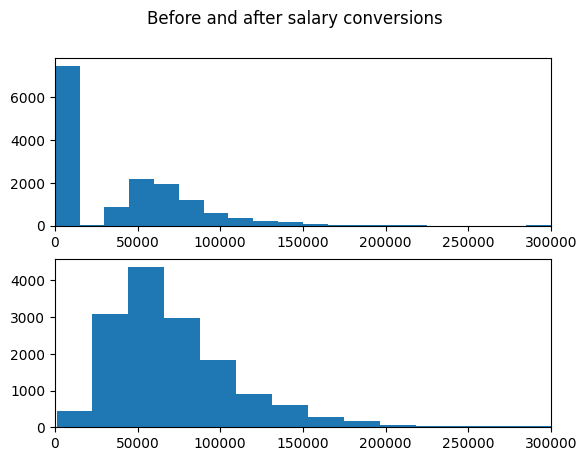

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Before and after salary conversions')
ax1.hist(combined_df.avg_salary, bins=100)
ax2.hist(combined_df.salary_label, bins=100)
ax1.set_xlim(0,300000)
plt.xlim(0,300000)

plt.show()


1. Bucket Levels
  Entry Level: No Experience
  Junior: 2 or less
  Mid: 3-7
  Senior: 8+
  Executive: Explicit
  Student/Intern:

2. Pull salaries out of salary data
  Make hourly into full time annual equivalent
  Make monthly/weekly into annual equivalent
  Need two columns: number itself, and what time period
  make assumption that salary is middle of the range
  currency column

3. Experiment with different salary buckets

4. Need to pull out additional info: industry, location (country?), function

Concern:
Description and title might include info about labels
Could we use another NLP technique to strip this info out prior to training our larger model? We don't wan't our model to rely too much on the data existing, and not generalize well to descriptions that don't include it.